# SPAM-HAM DATASET

In [96]:
#pip install keras

In [95]:
#pip install tensorflow

In [55]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import tensorflow 

## Importing data

In [56]:
messages = pd.read_csv(r"D:\denis\spam.csv",encoding ='cp1252')

In [57]:
messages.head(50)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [58]:
messages.shape 

(6776, 5)

In [59]:
messages = messages.iloc[:,[0,1]]
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
messages.rename(columns = {"v1":"label","v2":"message"},inplace=True)

In [61]:
messages.label.replace({"ham":0,"spam":1},inplace = True)

In [62]:
messages.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
messages.message = messages.message.str.lower() ## Convert to lower case

In [64]:
messages.head(20)

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
5,1,freemsg hey there darling it's been 3 week's n...
6,0,even my brother is not like to speak with me. ...
7,0,as per your request 'melle melle (oru minnamin...
8,1,winner!! as a valued network customer you have...
9,1,had your mobile 11 months or more? u r entitle...


In [65]:
from nltk.corpus import stopwords

In [66]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [69]:
import wordcloud
from wordcloud import WordCloud

In [70]:
cloud = WordCloud().generate(str(messages['message']))

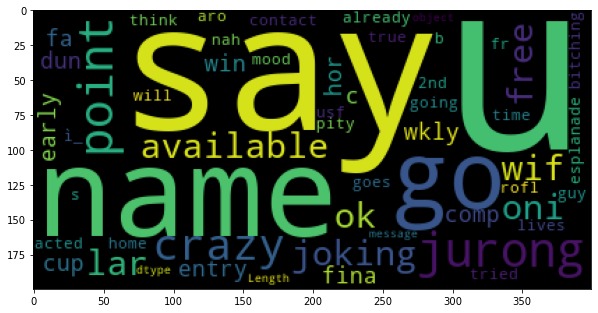

In [71]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

## For Ham

In [72]:
cloud = WordCloud(max_words=20,
stopwords=stopwords.words("english")).generate(str(messages.message[messages.label==0]))

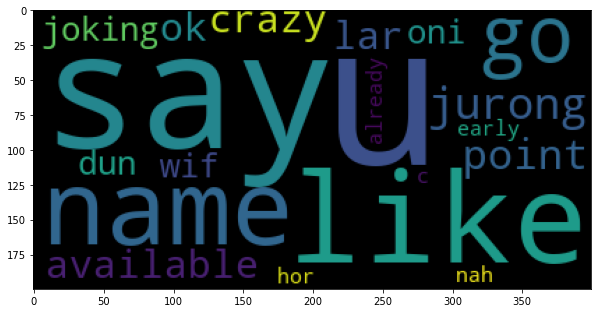

In [73]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

## For Spam

In [74]:
cloud = WordCloud(max_words=20,
stopwords=stopwords.words("english")).generate(str(messages.message[messages.label==1]))

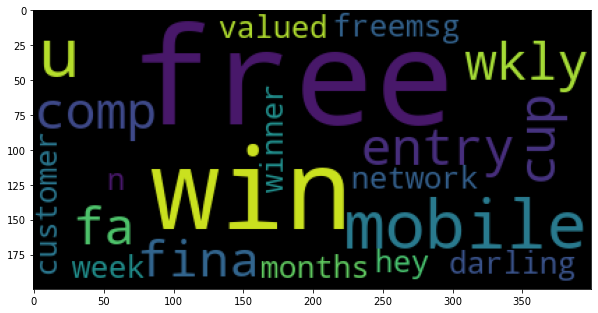

In [75]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [77]:
import string

In [78]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [79]:
def text_process(mess):                ## Create a function
    """                                # A docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split()if word not in stopwords.words("english")]

In [80]:
messages['message'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

In [81]:
from sklearn.feature_extraction.text import CountVectorizer #
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages["message"])

In [82]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [83]:
len(bow_transformer.vocabulary_) ## Which implies if i convert this to tdm , my tdm will have 9422 columns 

9422

In [84]:
messages_bow = bow_transformer.transform(messages.message)

In [85]:
messages_bow.shape

(6776, 9422)

In [86]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(messages_bow,messages.label,test_size=.2,random_state=35)

# Model on Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [89]:
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)

tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[1136,   74],
       [  34,  112]], dtype=int64)

In [90]:
Accuracy = tab_dt.diagonal().sum() / tab_dt.sum()*100
Accuracy

92.03539823008849

# Model on Navive Bayes

In [91]:
from sklearn.naive_bayes import MultinomialNB

In [92]:
naive_bayes = MultinomialNB()

In [93]:
naive_bayes.fit(x_train, y_train)
pred_nb = naive_bayes.predict(x_test)

tab_nb = confusion_matrix(pred_nb,y_test)
tab_nb

array([[1155,    9],
       [  15,  177]], dtype=int64)

In [94]:
Accuracy = tab_nb.diagonal().sum() / tab_nb.sum()*100
Accuracy

98.23008849557522